# Pre-traitement faisabilité méthodes récentes

## Sommaire

### Importation des librairies utilisées

### Chargement de nos données

### Approche de type word/sentence embedding classique avec Word2Vec (FastText) 

* Créer les embeddings de mots à partir d'un corpus de texte

* Générer des embeddings de phrases à partir des embeddings de mots produits par le modèle FastText

* Réduire la dimensionnalité des embeddings de phrases à l'aide PCA ET TSNE

* Analyse visuelle : affichage T-SNE selon catégories d'images

* Analyse visuelle avec les clusters (KMeans) après un PCA et TSNE

### Approche de type word/sentence embedding avec BERT

* Tokenisation Bert et creation des embedings 

* Extraction des embeddings de phrases à l'aide de BERT pour une analyse sémantique des produits

* Analyse visuelle des embedings Bert après la réduction PCA et TSNE

* Réduction de dimension PCA, T-SNE, Kmeans et affichage des images par catégorie 

### Approche de type word/sentence embedding avec USE (Universal Sentence Encoder)

* Création des embeddings par USE

*  Développement et évaluation d'un modèle de classification de produits basé sur les embeddings de phrases de l'Universal Sentence Encoder 

* Une représentation graphique des embeddings

* Analyse visuelle des embedings USE après la réduction PCA et TSNE

* Réduction de dimension PCA, T-SNE, Kmeans et affichage des images par catégorie 

### Etude de faisabilité par méthode CNN transfert learning

* Chargement des images

* Encodage des catégories de produits en étiquettes numériques pour la classification des images

* Création du modèle pré-entraîné

* Création des features des images

* Réduction de dimension PCA

* Réduction de dimension T-SNE et affichage des images selon vraies classes

* Création de clusters à partir du T-SNE et affichage des images selon clusters

* Analyse par classes

## Importation des librairies utilisées

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.tokenize import word_tokenize
from gensim.models import FastText
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import cluster, metrics
from sklearn import metrics, decomposition, manifold
from sklearn.metrics import adjusted_rand_score

from transformers import BertTokenizer, BertModel
import torch

import tensorflow as tf
import tensorflow_hub as hub
import time

import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os
from tqdm import tqdm
from os import listdir

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras import optimizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [44]:
pip install transformers


     ---------------------------------------- 7.4/7.4 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 268.8/268.8 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 861.7 kB/s eta 0:00:00
     -------------------------------------- 263.9/263.9 kB 1.2 MB/s eta 0:00:00


In [2]:
pip install torch

     ------------------------------------ 172.4/172.4 MB 791.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)
     ---------------------------------------- 1.7/1.7 MB 802.9 kB/s eta 0:00:00
     -------------------------------------- 24.4/24.4 MB 697.5 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 699.9 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 708.3 kB/s eta 0:00:00
     ------------------------------------ 440.8/440.8 kB 671.7 kB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 14.9/14.9 MB 511.4 k

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.24.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [3]:
pip install tensorflow-hub

     -------------------------------------- 90.3/90.3 kB 851.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Chargement de nos données

In [2]:
flipkart_df = pd.read_csv('./data/Flipkart/flipkart_com-ecommerce_sample_1050.csv')

In [3]:
flipkart_df = pd.read_csv('./data/Flipkart/flipkart_target.csv')
flipkart_df

,uniq_id,product_name,description,product_category_tree
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care
1047,5912e037d12774bb73a2048f35a00009,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care


In [4]:
# Chargement des données lemmentisées
flipkart_lemmatized = pd.read_csv('./data/Flipkart/flipkart_lemmatized.csv')
flipkart_lemmatized

,uniq_id,product_name,description,product_category_tree,description_tokens,product_name_tokens
0,55b85ea15a1536d46b7190ad6fff8ce7,elegance polyester multicolor abstract eyelet ...,key features of elegance polyester multicolor ...,Home Furnishing,"['key', 'feature', 'elegance', 'polyester', 'm...","['elegance', 'polyester', 'multicolor', 'abstr..."
1,7b72c92c2f6c40268628ec5f14c6d590,sathiyas cotton bath towel,specifications of sathiyas cotton bath towel 3...,Baby Care,"['specification', 'sathiyas', 'cotton', 'bath'...","['sathiyas', 'cotton', 'bath', 'towel']"
2,64d5d4a258243731dc7bbb1eef49ad74,eurospa cotton terry face towel set,key features of eurospa cotton terry face towe...,Baby Care,"['key', 'feature', 'eurospa', 'cotton', 'terry...","['eurospa', 'cotton', 'terry', 'face', 'towel'..."
3,d4684dcdc759dd9cdf41504698d737d8,santosh royal fashion cotton printed king size...,key features of santosh royal fashion cotton p...,Home Furnishing,"['key', 'feature', 'santosh', 'royal', 'fashio...","['santosh', 'royal', 'fashion', 'cotton', 'pri..."
4,6325b6870c54cd47be6ebfbffa620ec7,jaipur print cotton floral king sized double b...,key features of jaipur print cotton floral kin...,Home Furnishing,"['key', 'feature', 'jaipur', 'print', 'cotton'...","['jaipur', 'print', 'cotton', 'floral', 'king'..."
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,oren empower extra large self adhesive sticker,oren empower extra large self adhesive sticker...,Baby Care,"['oren', 'empower', 'extra', 'large', 'self', ...","['oren', 'empower', 'extra', 'large', 'self', ..."
1046,fd6cbcc22efb6b761bd564c28928483c,wallmantra large vinyl sticker sticker,wallmantra large vinyl sticker sticker pack of...,Baby Care,"['wallmantra', 'large', 'vinyl', 'sticker', 's...","['wallmantra', 'large', 'vinyl', 'sticker', 's..."
1047,5912e037d12774bb73a2048f35a00009,uberlyfe extra large pigmented polyvinyl films...,buy uberlyfe extra large pigmented polyvinyl f...,Baby Care,"['buy', 'uberlyfe', 'extra', 'large', 'pigment...","['uberlyfe', 'extra', 'large', 'pigment', 'pol..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,wallmantra medium vinyl sticker sticker,buy wallmantra medium vinyl sticker sticker fo...,Baby Care,"['buy', 'wallmantra', 'medium', 'vinyl', 'stic...","['wallmantra', 'medium', 'vinyl', 'sticker', '..."


In [5]:
#importation des données des images et catégories:
flipkart_img_df=pd.read_csv('./data/Flipkart/flipkart_img_df.csv')
flipkart_img_df

,image,product_category_tree
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care


## Approche de type word/sentence embedding classique avec Word2Vec (FastText) 

### Créer les embeddings de mots à partir d'un corpus de texte

In [6]:
# Concaténer les colonnes 'description' et 'product_name' pour créer le corpus de texte
corpus = flipkart_lemmatized['description'] + " " + flipkart_lemmatized['product_name']

# Tokeniser chaque document dans le corpus
corpus = [word_tokenize(doc) for doc in corpus]

# Création du modèle FastText
model = FastText(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

# Sauvegarder le modèle
model.save("fasttext_model")

# Charger le modèle sauvegardé
# model = FastText.load("fasttext_model")

# Obtenir l'embedding d'un mot spécifique
word_embedding = model.wv['chat']
print("Embedding du mot 'chat' :")
print(word_embedding)

# Rechercher les mots similaires à un mot donné
similar_words = model.wv.most_similar('chat', topn=5)
print("Mots similaires à 'chat' :")
for word, score in similar_words:
    print(word, score)

Embedding du mot 'chat' :
[-4.7558166e-02  1.3671523e-01 -9.1189429e-02  3.9309204e-01
  4.0116784e-01 -6.9472954e-02  4.1860018e-02  1.2731017e-01
  3.1450349e-01 -9.0578371e-01  2.7370527e-01 -4.6046752e-01
 -9.6699074e-02  6.4112037e-01 -1.2123942e-01  6.1434790e-02
  4.9906775e-01 -4.0140936e-01  6.1394192e-02 -4.5425603e-01
 -7.4081326e-01 -3.1237496e-02  1.4709495e-01  1.4890625e-01
 -4.8226026e-01  5.0828196e-02 -3.1308863e-01 -4.8780373e-01
  2.2432436e-01 -1.0043974e-01 -5.9086848e-02  3.4834558e-01
  4.2611608e-01  3.4250557e-02 -3.0992687e-02  3.4102142e-01
  3.6569700e-01  3.3129969e-01 -4.5519477e-01 -1.4446868e-01
  3.2789519e-01 -3.3719099e-01  9.6035075e-01 -9.3945312e-01
 -1.3589674e-01  1.1518199e-01 -3.1825683e-01 -3.4655479e-01
  1.4316687e-01  1.3510716e-01 -3.4924093e-01  1.0947195e-01
  1.4328863e-01 -3.7653424e-02  6.9389485e-02  3.1522721e-01
 -5.8404022e-01  2.5590423e-01  8.5986743e-04 -2.3412025e-02
 -5.7423782e-01 -2.7618796e-02  2.5287902e-01  4.8602853e-0

### Générer des embeddings de phrases à partir des embeddings de mots produits par le modèle FastText

In [7]:
def get_sentence_embedding(sentence, model):
    embeddings = [model.wv[word.lower()] for word in sentence if word.lower() in model.wv]  # Obtenir les embeddings des mots présents dans le modèle
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)  # Calculer la moyenne des embeddings de mots pour obtenir l'embedding de la phrase
    else:
        return np.zeros(model.vector_size)  # Si aucun mot n'est présent dans le modèle, renvoyer un embedding de zéros

# Obtenir les embeddings de phrases pour toutes les phrases du corpus
sentence_embeddings = np.array([get_sentence_embedding(sentence, model) for sentence in corpus])
# Vérifier la taille des embeddings obtenus
print("Taille des embeddings de phrases :", len(sentence_embeddings[0]))

Taille des embeddings de phrases : 100


In [16]:
def sentence_to_embedding(sentence, model):
    words = sentence.split()
    word_embeddings = [model.wv[word] for word in words if word in model.wv.key_to_index]
    return np.mean(word_embeddings, axis=0)

# Exemple d'utilisation
sentence = "chat avec moi"
sentence_embedding = sentence_to_embedding(sentence, model)
print("Embedding de la phrase '{}' :".format(sentence))
print(sentence_embedding)

Embedding de la phrase 'chat avec moi' :
[ 5.90188168e-02  8.45960826e-02 -6.73227236e-02  3.51440877e-01
  4.53106433e-01 -4.26955111e-02  1.73549801e-01  1.75930664e-01
  2.98431993e-01 -6.67892456e-01  1.82833150e-01 -5.32335103e-01
 -1.23443291e-01  5.92442095e-01 -3.00909728e-01 -5.97115867e-02
  5.57328224e-01 -3.31725985e-01  1.08733326e-01 -4.39861745e-01
 -6.93153799e-01 -5.75785376e-02  9.06886905e-02  2.15399727e-01
 -3.00312221e-01  1.14443012e-01 -2.57992625e-01 -4.99820530e-01
  3.37110162e-01 -1.52695358e-01 -1.76679522e-01  4.40289468e-01
  5.12275696e-01  5.77127337e-02  1.61003191e-02  2.80249834e-01
  5.28738379e-01  3.54193091e-01 -4.51843768e-01 -7.17988685e-02
  2.77802110e-01 -3.75409871e-01  8.94369364e-01 -9.28025246e-01
 -1.20349713e-01  1.80078968e-01 -3.07248086e-01 -1.76721856e-01
  2.17501819e-01  1.87810004e-01 -4.18342501e-01  1.62899122e-01
  1.93762779e-01 -6.93421811e-02  1.59331350e-04  2.21613973e-01
 -5.91703236e-01  4.41137314e-01 -8.54584053e-02 

### Réduire la dimensionnalité des embeddings de phrases à l'aide PCA ET TSNE

In [8]:
# Convertir la liste d'embeddings en un tableau numpy
sentence_embeddings_np = np.array(sentence_embeddings)

# Spécifier le nombre de composantes à conserver avec PCA
pca = PCA(n_components=0.99)
sentence_embeddings_reduced_pca = pca.fit_transform(sentence_embeddings_np)

# Réduction en 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, init='random', learning_rate=200)
sentence_embeddings_reduced_tsne = tsne.fit_transform(sentence_embeddings_reduced_pca)

### Analyse visuelle : affichage T-SNE selon catégories d'images

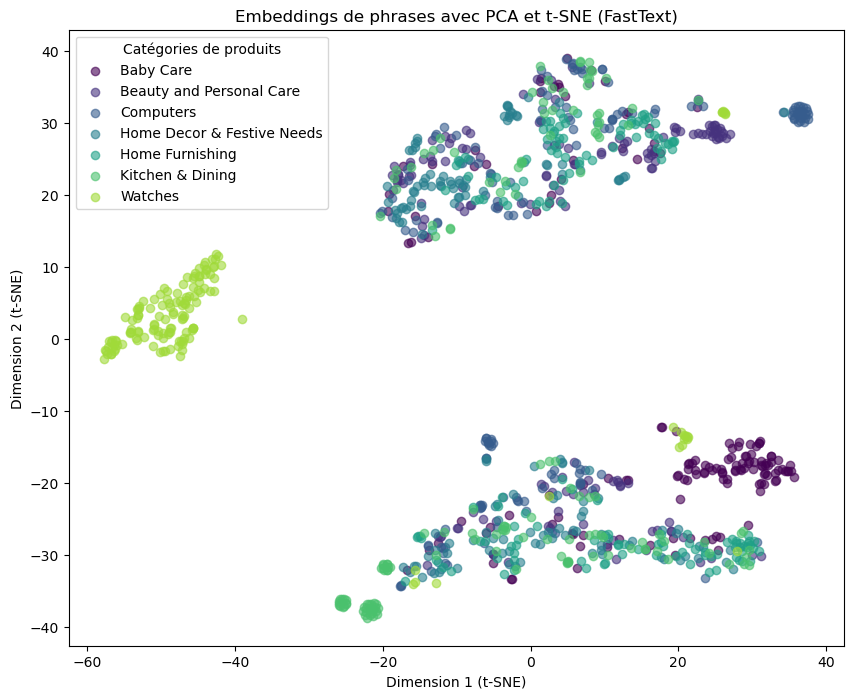

In [9]:
# Conversion des catégories en labels numériques pour la coloration
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(flipkart_lemmatized['product_category_tree'])

# Créer un dictionnaire de couleurs pour chaque catégorie unique
color_dict = {category: np.array(plt.cm.viridis(i/len(label_encoder.classes_))) for i, category in enumerate(label_encoder.classes_)}

# Créer un scatter plot
plt.figure(figsize=(10, 8))
for label in label_encoder.classes_:
    idxs = np.where(labels == label_encoder.transform([label])[0])
    plt.scatter(sentence_embeddings_reduced_tsne[idxs, 0], sentence_embeddings_reduced_tsne[idxs, 1], color=color_dict[label], alpha=0.6, label=label)

# Ajout de la légende au plot avec un titre
plt.legend(loc='best', title='Catégories de produits')

plt.xlabel('Dimension 1 (t-SNE)')
plt.ylabel('Dimension 2 (t-SNE)')
plt.title('Embeddings de phrases avec PCA et t-SNE (FastText)')
plt.savefig('t-SNE_FastText.png')
plt.show()

### Analyse visuelle avec les clusters (KMeans) après un PCA et TSNE

In [10]:
# Utiliser KMeans pour effectuer le clustering des embeddings de phrases
num_clusters = 7  # Choisissez le nombre de clusters que vous souhaitez
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(sentence_embeddings)

C:\Users\tidib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\tidib\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


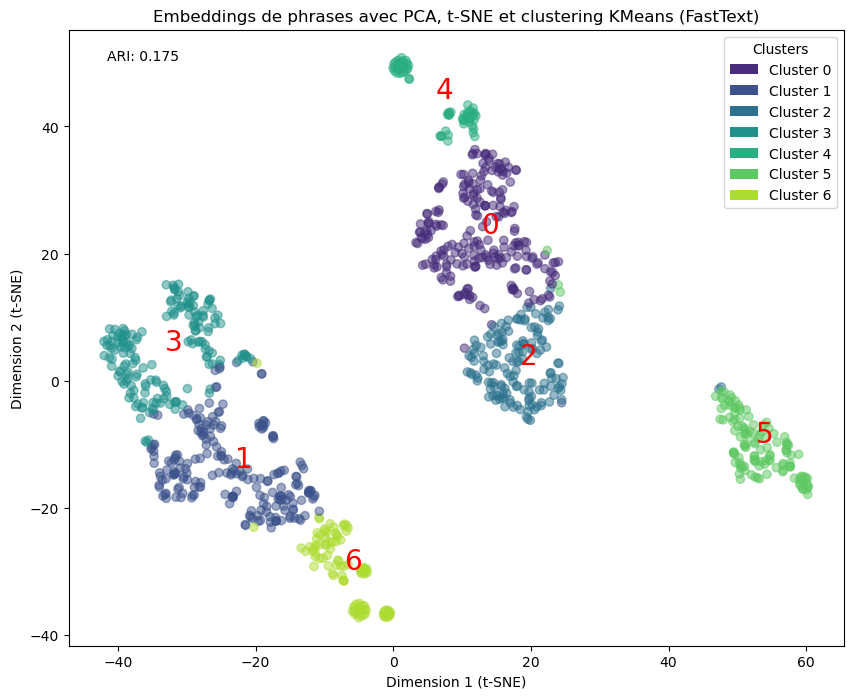

In [11]:
# Spécifier le nombre de composantes à conserver avec PCA
pca = PCA(n_components=0.99)
sentence_embeddings_reduced = pca.fit_transform(sentence_embeddings)

# Réduction en 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, init='random', learning_rate=200 ,random_state=42)
sentence_embeddings_2d = tsne.fit_transform(sentence_embeddings_reduced)

# Convertir les catégories en nombres entiers pour représenter les classes réelles
label_encoder = LabelEncoder()
category_labels = label_encoder.fit_transform(flipkart_df['product_category_tree'])

# Nombre de clusters à définir
num_clusters = len(set(category_labels))

# Appliquer KMeans sur les embeddings de phrases
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(sentence_embeddings)

# Calculer le score ARI (Adjusted Rand Index)
ari = adjusted_rand_score(category_labels, clusters)

# Créer une figure
plt.figure(figsize=(10, 8))

# Création d'une palette de couleurs pour chaque cluster unique
palette = sns.color_palette('viridis', num_clusters)

# Créer un mapping entre les clusters et les couleurs
color_mapping = {cluster: palette[i] for i, cluster in enumerate(np.unique(clusters))}

# Utiliser la palette pour colorer les points selon les clusters
scatter_colors = [color_mapping[cluster] for cluster in clusters]

# Afficher chaque point du graphique 2D et le colorer selon son cluster
scatter = plt.scatter(sentence_embeddings_2d[:, 0], sentence_embeddings_2d[:, 1], c=scatter_colors, alpha=0.5)

# Ajouter une légende avec les centres des clusters
for cluster_num in range(num_clusters):
    center = sentence_embeddings_2d[clusters == cluster_num].mean(axis=0)
    plt.text(center[0], center[1], str(cluster_num), fontsize=20, color='red')

# Créer une légende personnalisée avec un patch de couleur pour chaque cluster
legend_elements = [Patch(facecolor=color_mapping[i], label=f'Cluster {i}') for i in range(num_clusters)]

# Ajout de la légende au plot
plt.legend(handles=legend_elements, loc='best', title='Clusters')

# Afficher le score ARI
plt.text(0.05, 0.95, f'ARI: {ari:.3f}', transform=plt.gca().transAxes)

# Afficher le graphique
plt.xlabel('Dimension 1 (t-SNE)')
plt.ylabel('Dimension 2 (t-SNE)')
plt.title('Embeddings de phrases avec PCA, t-SNE et clustering KMeans (FastText)')
plt.savefig('KMeans_FastText.png')
plt.show()

## Approche de type word/sentence embedding avec BERT

### Tokenisation Bert et creation des embedings 

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Exemple de phrases à partir du DataFrame flipkart_df
description_phrases = flipkart_df['product_name'].apply(lambda tokens: " ".join(tokens)).tolist()
product_name_phrases = flipkart_df['description'].apply(lambda tokens: " ".join(tokens)).tolist()

# Encodage des phrases en tokens BERT avec troncation à une longueur maximale de 512
encoded_description = tokenizer(description_phrases, return_tensors='pt', padding=True, truncation=True, max_length=512)
encoded_product_name = tokenizer(product_name_phrases, return_tensors='pt', padding=True, truncation=True, max_length=512)

# Obtenir les embeddings des tokens pour la colonne 'description_tokens'
with torch.no_grad():
    description_outputs = model(**encoded_description)

# Obtenir les embeddings des tokens pour la colonne 'product_name_tokens'
with torch.no_grad():
    product_name_outputs = model(**encoded_product_name)

# Agréger les embeddings en utilisant la moyenne des tokens pour chaque colonne
description_embeddings = torch.mean(description_outputs.last_hidden_state, dim=1).numpy()
product_name_embeddings = torch.mean(product_name_outputs.last_hidden_state, dim=1).numpy()

# Ajouter les embeddings comme nouvelles colonnes dans le DataFrame flipkart_df
for i in range(description_embeddings.shape[1]):
    col_name = f'description_embedding_{i+1}'
    flipkart_df[col_name] = description_embeddings[:, i]

for i in range(product_name_embeddings.shape[1]):
    col_name = f'product_name_embedding_{i+1}'
    flipkart_df[col_name] = product_name_embeddings[:, i]

# Afficher le DataFrame avec les nouvelles colonnes d'embeddings
print(flipkart_df.head())

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Extraction des embeddings de phrases à l'aide de BERT pour une analyse sémantique des produits

In [43]:
# Charger le modèle et le tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Fonction pour encoder les phrases en lots
def encode_sentences(sentences, model, tokenizer, batch_size=32):
    embeddings = []
    for i in range(0, len(sentences), batch_size):
        batch_sentences = sentences[i:i+batch_size]
        encoded_input = tokenizer(batch_sentences, return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            outputs = model(**encoded_input)
        embeddings.extend(torch.mean(outputs.last_hidden_state, dim=1).numpy())
    return np.array(embeddings)

# Utiliser un échantillon de données pour l'exemple
flipkart_sample = flipkart_df.sample(1000, random_state=42)

# Concaténer les colonnes 'description' et 'product_name' pour créer le corpus de texte
corpus = flipkart_sample['description'] + " " + flipkart_sample['product_name']

# Obtenir les embeddings de phrases
sentence_embeddings = encode_sentences(corpus.tolist(), model, tokenizer)

# Convertir les embeddings de phrases en DataFrame
embeddings_df = pd.DataFrame(sentence_embeddings, columns=[f'sentence_embedding_{i+1}' for i in range(sentence_embeddings.shape[1])])

# Réinitialiser l'index de l'échantillon pour qu'il corresponde à celui de embeddings_df
flipkart_sample.reset_index(drop=True, inplace=True)

# Concaténer l'échantillon et les embeddings
flipkart_sample = pd.concat([flipkart_sample, embeddings_df], axis=1)

# Afficher le DataFrame avec les nouvelles colonnes d'embeddings
print(flipkart_sample.head())

                                        product_name  \
0                                     Zyxel PLA-4205   
1           Philips 9.5 W LED B22 3000K A55 IND Bulb   
2  Lapguard Lenovo IdeaPad V470 6 Cell Laptop Bat...   
3  Anna Andre Paris Set of Dark Fire & Numero 1 D...   
4   Lenco Bdblue Tango Analog Watch  - For Men, Boys   

                                         description  \
0  Buy Zyxel PLA-4205 only for Rs. 8100 from Flip...   
1  Buy Philips 9.5 W LED B22 3000K A55 IND Bulb f...   
2  Lapguard Lenovo IdeaPad V470 6 Cell Laptop Bat...   
3  Flipkart.com: Buy Anna Andre Paris Set of Dark...   
4  Lenco Bdblue Tango Analog Watch  - For Men, Bo...   

      product_category_tree  sentence_embedding_1  sentence_embedding_2  \
0                 Computers              0.083293             -0.239331   
1          Kitchen & Dining              0.094890             -0.128347   
2                 Computers             -0.292471              0.045100   
3  Beauty and Personal Car

In [45]:
flipkart_sample

,product_name,description,product_category_tree,sentence_embedding_1,sentence_embedding_2,sentence_embedding_3,sentence_embedding_4,sentence_embedding_5,sentence_embedding_6,sentence_embedding_7,...,sentence_embedding_759,sentence_embedding_760,sentence_embedding_761,sentence_embedding_762,sentence_embedding_763,sentence_embedding_764,sentence_embedding_765,sentence_embedding_766,sentence_embedding_767,sentence_embedding_768
0,Zyxel PLA-4205,Buy Zyxel PLA-4205 only for Rs. 8100 from Flip...,Computers,0.083293,-0.239331,0.455002,0.235834,0.304250,-0.091484,0.044322,...,0.078820,-0.089955,0.105415,-0.196846,-0.112136,-0.060264,-0.115806,0.117691,-0.026737,-0.245767
1,Philips 9.5 W LED B22 3000K A55 IND Bulb,Buy Philips 9.5 W LED B22 3000K A55 IND Bulb f...,Kitchen & Dining,0.094890,-0.128347,0.450175,0.108430,0.082864,-0.122824,-0.056944,...,-0.071649,-0.167805,0.144330,-0.076304,0.018143,-0.136580,-0.096924,0.060541,0.077795,-0.326196
2,Lapguard Lenovo IdeaPad V470 6 Cell Laptop Bat...,Lapguard Lenovo IdeaPad V470 6 Cell Laptop Bat...,Computers,-0.292471,0.045100,0.320325,0.083487,0.439468,-0.131294,0.141765,...,-0.078262,-0.240363,0.246066,-0.127472,-0.275295,-0.301154,-0.073853,-0.103293,-0.130673,-0.065889
3,Anna Andre Paris Set of Dark Fire & Numero 1 D...,Flipkart.com: Buy Anna Andre Paris Set of Dark...,Beauty and Personal Care,0.062566,-0.126476,0.386796,0.166792,0.298587,-0.107177,0.124575,...,-0.055629,-0.109689,0.009222,-0.103356,-0.196601,-0.029866,-0.097552,0.113861,-0.046699,-0.216723
4,"Lenco Bdblue Tango Analog Watch - For Men, Boys","Lenco Bdblue Tango Analog Watch - For Men, Bo...",Watches,0.179676,-0.197562,0.525673,0.143494,0.271687,-0.176068,0.136538,...,-0.106028,-0.026354,0.115202,-0.124528,-0.132426,-0.149545,-0.233198,-0.014606,-0.000536,-0.257491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Milton Opaque Series 630 ml Water Bottle,Flipkart.com: Buy Milton Opaque Series 630 ml ...,Kitchen & Dining,0.127975,-0.140119,0.526543,0.193620,0.279761,-0.017719,0.125639,...,0.042903,-0.140561,0.032228,-0.177737,-0.179488,-0.074861,-0.078839,0.102179,-0.130803,-0.120185
996,Aroma Comfort Polyester Brown Self Design Eyel...,Key Features of Aroma Comfort Polyester Brown ...,Home Furnishing,-0.004201,0.058322,0.485776,0.033484,0.203026,0.111566,0.169197,...,0.262891,-0.308687,0.039522,-0.033009,0.058699,-0.258690,0.000786,-0.091592,-0.123092,-0.132304
997,Beverly Hills Polo Club RED Gift Set Combo Set,Flipkart.com: Buy Beverly Hills Polo Club RED ...,Beauty and Personal Care,0.186005,-0.230798,0.474185,0.221205,0.343619,-0.132588,0.090582,...,0.108462,-0.094811,-0.018800,-0.119704,-0.198943,0.014532,-0.114070,0.148247,-0.073834,-0.204144
998,Aapno Rajasthan Princess Design Showpiece - ...,Buy Aapno Rajasthan Princess Design Showpiece ...,Home Decor & Festive Needs,0.095118,-0.247468,0.451387,0.116152,0.210907,-0.007696,-0.006460,...,0.023515,0.000312,0.221040,-0.094757,-0.145299,-0.143610,-0.110615,-0.056553,-0.067220,-0.229229


### Analyse visuelle des embedings Bert après la réduction PCA et TSNE

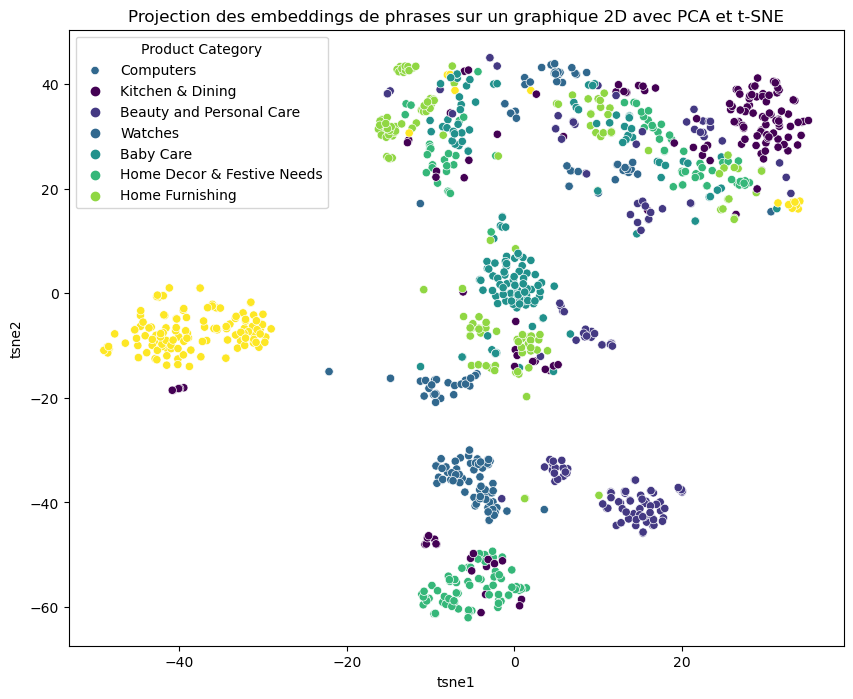

In [172]:
# Concaténer les embeddings des colonnes 'description_tokens' et 'product_name_tokens'
combined_embeddings = flipkart_sample.iloc[:, -200:].values

# Spécifier le nombre de composantes à conserver avec PCA
pca = PCA(n_components=0.99)
reduced_embeddings = pca.fit_transform(combined_embeddings)

# Réduction en 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, init='random', learning_rate=200 ,random_state=42)
embeddings_2d = tsne.fit_transform(reduced_embeddings)

# Convertir les catégories en nombres entiers pour représenter les couleurs
label_encoder = LabelEncoder()
category_labels = label_encoder.fit_transform(flipkart_sample['product_category_tree'])

# Créer une DataFrame avec les embeddings réduits et leurs étiquettes de catégories correspondantes
df_tsne = pd.DataFrame(data=embeddings_2d, columns=['tsne1', 'tsne2'])
df_tsne['class'] = category_labels

# Obtenir les noms uniques de la variable 'product_category_tree'
category_names = flipkart_sample['product_category_tree'].unique()

# Créer une figure
plt.figure(figsize=(10, 8))

# Utiliser seaborn pour colorer les points en fonction des catégories
sns.scatterplot(x='tsne1', y='tsne2', hue='class', data=df_tsne, palette='viridis')

# Ajouter une légende avec les noms des catégories
plt.legend(title='Product Category', labels=category_names)

# Afficher le graphique
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.title('Projection des embeddings de phrases sur un graphique 2D avec PCA et t-SNE (BERT)')
plt.savefig('t-SNE_BERT.png')
plt.show()

In [23]:
# Effectuer le clustering avec KMeans
kmeans = KMeans(n_clusters=len(category_names), random_state=42)
clusters = kmeans.fit_predict(combined_embeddings)

# Convertir les catégories en nombres entiers pour représenter les classes réelles
category_labels = label_encoder.fit_transform(flipkart_sample['product_category_tree'])

# Calcul de l'Adjusted Rand Index (ARI)
ari = metrics.adjusted_rand_score(category_labels, clusters)
print("ARI : ", ari)

ARI :  0.2408484984125681


### Réduction de dimension PCA, T-SNE, Kmeans et affichage des images par catégorie 

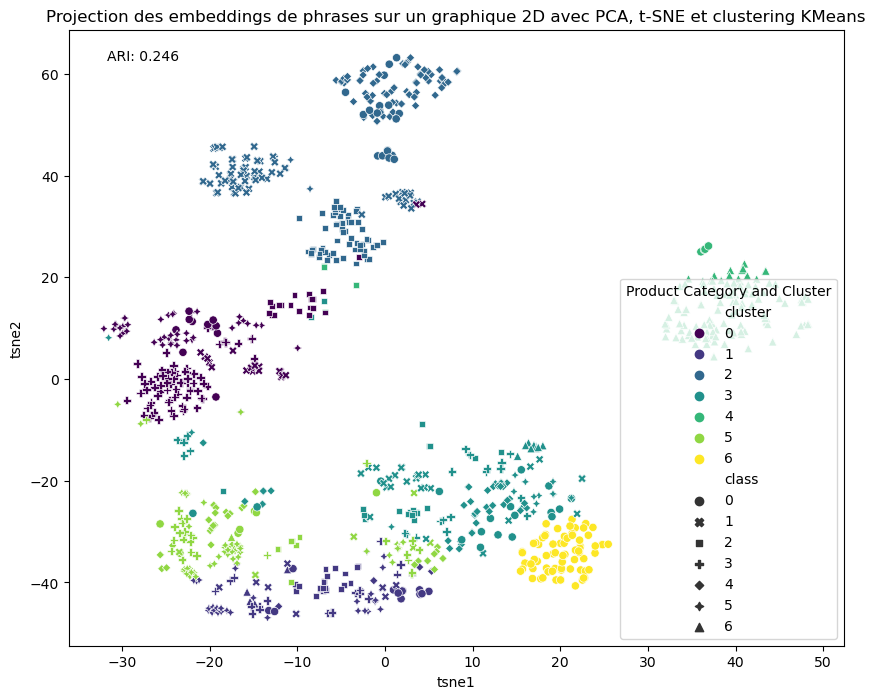

In [175]:
# Convertir les catégories en nombres entiers pour représenter les classes réelles
label_encoder = LabelEncoder()
category_labels = label_encoder.fit_transform(flipkart_sample['product_category_tree'])

# Réduction en 50 dimensions avec PCA
pca = PCA(n_components=0.99)
sentence_embeddings_reduced = pca.fit_transform(sentence_embeddings)

# Réduction en 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, init='random', learning_rate=200 ,random_state=42)
sentence_embeddings_2d = tsne.fit_transform(sentence_embeddings_reduced)

# Nombre de clusters à définir
num_clusters = len(set(category_labels))

# Appliquer KMeans sur les embeddings de phrases réduites
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(sentence_embeddings_reduced)

# Calculer le score ARI (Adjusted Rand Index)
ari = adjusted_rand_score(category_labels, clusters)

# Créer une DataFrame avec les embeddings réduits et leurs étiquettes de catégories correspondantes
df_tsne = pd.DataFrame(data=sentence_embeddings_2d, columns=['tsne1', 'tsne2'])
df_tsne['class'] = category_labels
df_tsne['cluster'] = clusters

# Créer une figure
plt.figure(figsize=(10, 8))

# Utiliser seaborn pour colorer les points en fonction des clusters
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=df_tsne, palette='viridis', style='class')

# Ajouter une légende avec les noms des catégories
plt.legend(title='Product Category and Cluster')

# Afficher le score ARI
plt.text(0.05, 0.95, f'ARI: {ari:.3f}', transform=plt.gca().transAxes)

# Afficher le graphique
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.title('Projection des embeddings de phrases sur un graphique 2D avec PCA, t-SNE et clustering KMeans (BERT)')
plt.savefig('KMeans_BERT.png')
plt.show()

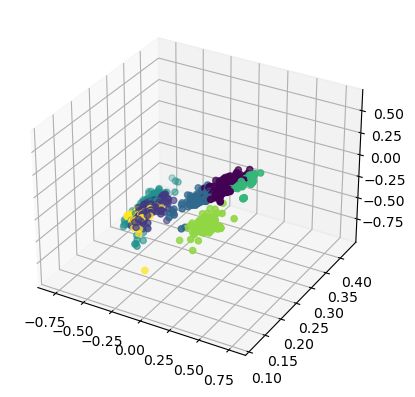

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sentence_embeddings[:,0], sentence_embeddings[:,1], sentence_embeddings[:,2], c=clusters)

## Approche de type word/sentence embedding avec USE (Universal Sentence Encoder)

### Création des embeddings par USE

In [7]:
# Charger le modèle Universal Sentence Encoder
use_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_model = hub.load(use_model_url)

# Concaténer les colonnes 'description' et 'product_name' pour créer le corpus de texte
corpus = flipkart_lemmatized['description'] + " " + flipkart_lemmatized['product_name']

# Obtenir les embeddings de phrases
sentence_embeddings = use_model(corpus)

# Transformer les embeddings de phrases en array Numpy
sentence_embeddings = sentence_embeddings.numpy()

# Afficher la taille des embeddings de phrases
print("Taille des embeddings de phrases :", sentence_embeddings.shape)

Taille des embeddings de phrases : (1050, 512)


### Développement et évaluation d'un modèle de classification de produits basé sur les embeddings de phrases de l'Universal Sentence Encoder 

In [8]:
# Convertir les catégories en labels numériques
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(flipkart_lemmatized['product_category_tree'])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, labels, test_size=0.2, random_state=42)

# Entraîner un modèle de régression logistique
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Évaluer le modèle sur l'ensemble de test
accuracy = classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.86%


### Une représentation graphique des embeddings

In [ ]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(sentence_embeddings[:,0], sentence_embeddings[:,1], sentence_embeddings[:,2], c=clusters)

### Analyse visuelle des embedings USE après la réduction PCA et TSNE

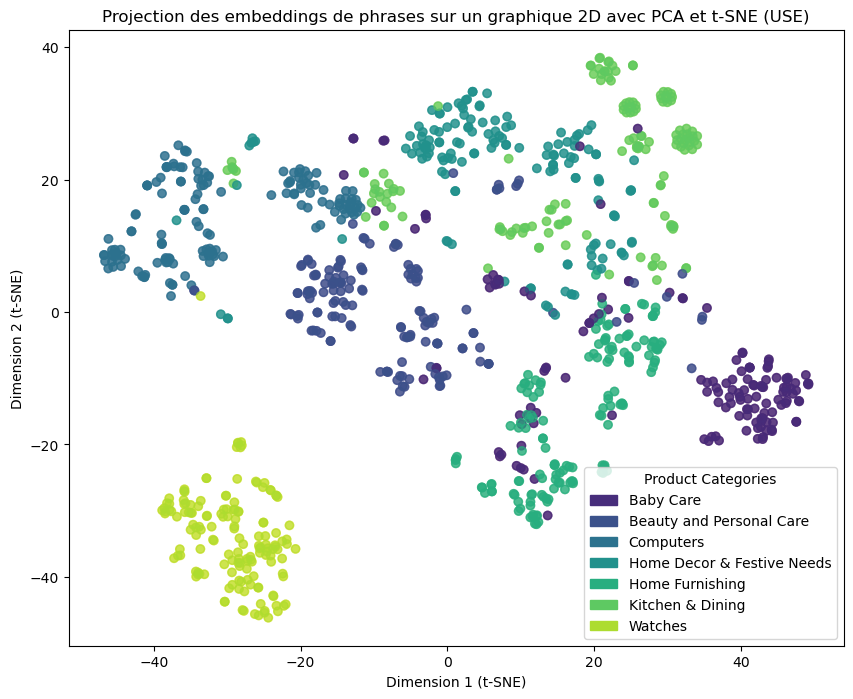

In [10]:
# Encoder les catégories de produits en nombres entiers
encoder = LabelEncoder()
product_categories_encoded = encoder.fit_transform(flipkart_lemmatized['product_category_tree'])

# Réduction en 50 dimensions avec PCA
pca = PCA(n_components=0.99)
reduced_embeddings = pca.fit_transform(sentence_embeddings)

# Réduction en 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, init='random', learning_rate=200 ,random_state=42)
embeddings_2d = tsne.fit_transform(reduced_embeddings)

# Créer une figure
plt.figure(figsize=(10, 8))

# Afficher les points sur un graphique 2D
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=product_categories_encoded, cmap='viridis', alpha=0.6)

# Création d'une palette de couleurs pour chaque catégorie unique
palette = sns.color_palette('viridis', len(encoder.classes_))

# Créer un mapping entre les catégories et les couleurs
color_mapping = {category: palette[i] for i, category in enumerate(encoder.classes_)}

# Utiliser la palette pour colorer les points selon leur catégorie
scatter_colors = [color_mapping[category] for category in flipkart_lemmatized['product_category_tree']]

# Afficher chaque point du scatter plot et le colorer selon sa catégorie
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=scatter_colors, alpha=0.6)

# Créer une légende personnalisée avec un patch de couleur pour chaque catégorie
legend_elements = [mpatches.Patch(color=color_mapping[category], label=category) for category in encoder.classes_]

# Ajout de la légende au plot
plt.legend(handles=legend_elements, loc='best', title='Product Categories')

# Afficher le graphique
plt.xlabel('Dimension 1 (t-SNE)')
plt.ylabel('Dimension 2 (t-SNE)')
plt.title('Projection des embeddings de phrases sur un graphique 2D avec PCA et t-SNE (USE)')
plt.savefig('t-SNE_USE.png')
plt.show()

### Réduction de dimension PCA, T-SNE, Kmeans et affichage des images par catégorie 

In [11]:
# Nombre de clusters à définir
num_clusters = 7

# Appliquer KMeans sur les embeddings de phrases
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(sentence_embeddings)

# Convertir les catégories en nombres entiers pour représenter les classes réelles
label_encoder = LabelEncoder()
category_labels = label_encoder.fit_transform(flipkart_lemmatized['product_category_tree'])

# Calculer l'Adjusted Rand Index (ARI) pour évaluer la qualité du clustering
ari = adjusted_rand_score(category_labels, clusters)
print("ARI : ", ari)

ARI :  0.32727716824075004


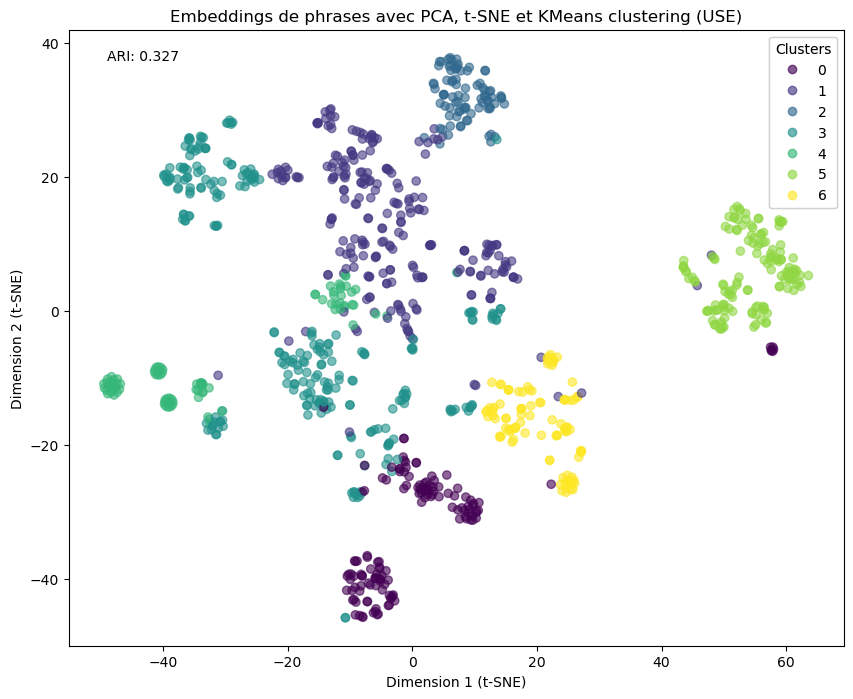

In [12]:
# Réduction des dimensions à 50 avec PCA
pca = PCA(n_components=50)
sentence_embeddings_reduced = pca.fit_transform(sentence_embeddings)

# Réduction des dimensions à 2 avec t-SNE
tsne = TSNE(n_components=2, init='random', learning_rate=200 ,random_state=42)
sentence_embeddings_2d = tsne.fit_transform(sentence_embeddings_reduced)

# Conversion des catégories en nombres entiers pour les classes réelles
label_encoder = LabelEncoder()
category_labels = label_encoder.fit_transform(flipkart_lemmatized['product_category_tree'])

# Nombre de clusters à définir
num_clusters = len(set(category_labels))

# Appliquer KMeans sur les embeddings de phrases
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(sentence_embeddings)

# Calculer le score ARI (Adjusted Rand Index)
ari = adjusted_rand_score(category_labels, clusters)

# Créer la figure et l'axe
fig, ax = plt.subplots(figsize=(10, 8))

# Afficher les points sur un graphique 2D, colorés par clusters
scatter = ax.scatter(sentence_embeddings_2d[:, 0], sentence_embeddings_2d[:, 1], c=clusters, alpha=0.6, cmap='viridis')

# Créer une légende basée sur les couleurs de scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

# Afficher le score ARI
plt.text(0.05, 0.95, f'ARI: {ari:.3f}', transform=plt.gca().transAxes)

# Afficher le graphique
plt.xlabel('Dimension 1 (t-SNE)')
plt.ylabel('Dimension 2 (t-SNE)')
plt.title('Embeddings de phrases avec PCA, t-SNE et KMeans clustering (USE)')
plt.savefig('KMeans_USE.png')
plt.show()

## Etude de faisabilité par méthode CNN transfert learning

### Chargement des images

In [25]:
# Le répertoire où se trouvent les images
image_directory = "C:/Users/tidib/Documents/DOCS_DataScientist/ClassifiezAutomatiquementDesBiensDeConsommation_TIDIANE_Barry/data/Flipkart/Images"

# La liste des images
image_list = os.listdir(image_directory)
(len(image_list))

1050

### Encodage des catégories de produits en étiquettes numériques pour la classification des images

In [26]:
#Attribution de numero par cétégories
list_labels = list(set(flipkart_img_df["product_category_tree"]))

img_df = pd.DataFrame()

img_df["image_path"] = flipkart_img_df["image"]
img_df["label_name"] = flipkart_img_df["product_category_tree"]
le = sklearn.preprocessing.LabelEncoder()
img_df["label"] = le.fit_transform(img_df["label_name"])
img_df.head(5)

,image_path,label_name,label
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4


In [27]:
# Regrouper les données en fonction de la colonne "label" et compte le nombre d'occurrences pour chaque label
img_df.groupby("label").count()

,image_path,label_name
label,,
0,150,150
1,150,150
2,150,150
3,150,150
4,150,150
5,150,150
6,150,150


### Création du modèle pré-entraîné

In [28]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

### Création des features des images

In [29]:
# Function to load and preprocess images
def load_and_preprocess_images(image_files):
    images = []
    for image_file in image_files:
        full_image_path = os.path.join(image_directory, image_file)
        image = load_img(full_image_path, target_size=(224, 224))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = preprocess_input(image)
        images.append(image)
    return np.vstack(images)

# Define batch_size
batch_size = 32

# Predict in batches
image_features = []
for i in range(0, len(img_df), batch_size):
    print(f"Processing batch {i // batch_size}")
    batch_files = img_df["image_path"].values[i: i + batch_size]
    batch_images = load_and_preprocess_images(batch_files)
    batch_features = model.predict(batch_images, verbose=0)
    image_features.append(batch_features)

# Concatenate all the features
image_features = np.concatenate(image_features, axis=0)

print(f"Image features shape: {image_features.shape}")

Processing batch 0
Processing batch 1
Processing batch 2
Processing batch 3
Processing batch 4
Processing batch 5
Processing batch 6
Processing batch 7
Processing batch 8
Processing batch 9
Processing batch 10
Processing batch 11
Processing batch 12
Processing batch 13
Processing batch 14
Processing batch 15
Processing batch 16
Processing batch 17
Processing batch 18
Processing batch 19
Processing batch 20
Processing batch 21


C:\Users\tidib\anaconda3\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Processing batch 22
Processing batch 23
Processing batch 24
Processing batch 25
Processing batch 26
Processing batch 27
Processing batch 28
Processing batch 29
Processing batch 30
Processing batch 31
Processing batch 32
Image features shape: (1050, 4096)


### Réduction de dimension PCA

In [30]:
print(image_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(image_features)
print(feat_pca.shape)

(1050, 4096)
(1050, 803)


### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [31]:
temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6, 
                     learning_rate='auto')
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(data = X_tsne, columns = ['tsne1', 'tsne2'])
df_tsne["class"] = img_df["label_name"]
print(df_tsne.shape)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

(1050, 3)
temps de T-SNE :             9.60 secondes


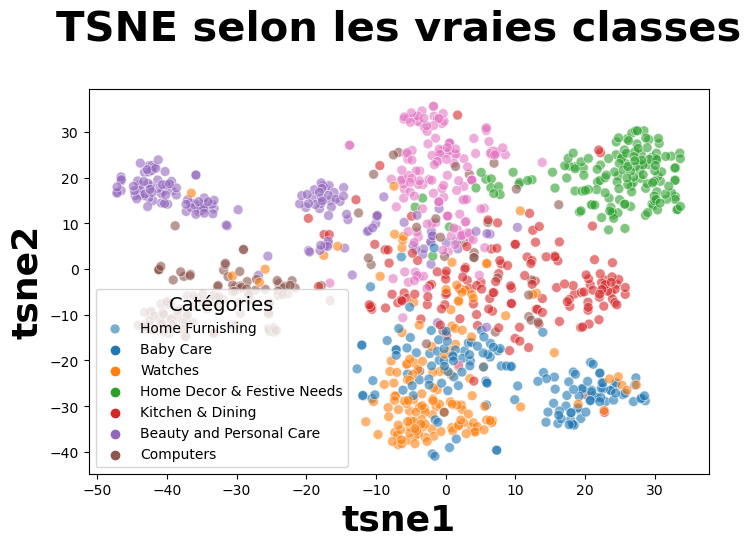

In [32]:
labels = df_tsne['class'].unique()

plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne,
    palette=sns.color_palette('tab10', n_colors=len(labels)), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')
ax.legend(title='Catégories', title_fontsize='14', labels=labels)
plt.show()


### Création de clusters à partir du T-SNE et affichage des images selon clusters

In [39]:
cls = cluster.KMeans(n_clusters=7, n_init=100)
cls.fit(X_tsne)

# Ajout des labels des clusters au DataFrame df_tsne
df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


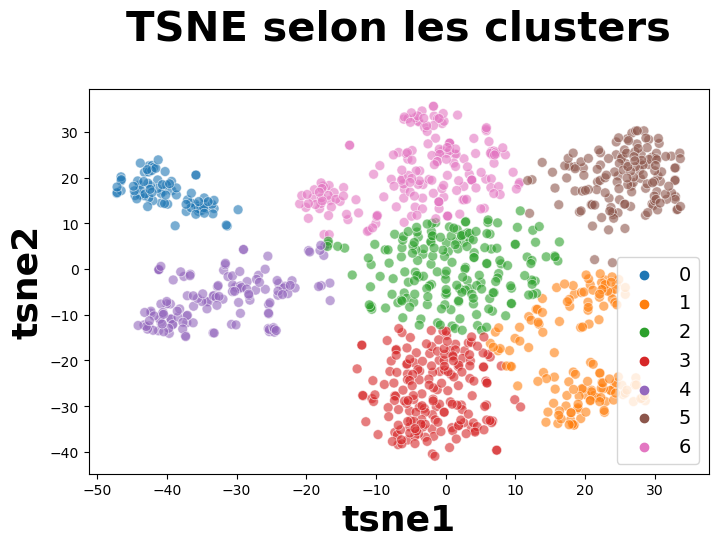

ARI :  0.45615948105725557


In [41]:
# Get the number of unique clusters in cls.labels_
n_colors = len(np.unique(cls.labels_))

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=n_colors), 
    s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')
plt.legend(prop={'size': 14})

plt.show()

labels = img_df["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes

In [35]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[  8   1   1 109  27   4   0]
 [  5   9   1   4  13 117   1]
 [  0 113   0   1  34   1   1]
 [ 54   7   0   2  80   1   6]
 [ 74   0   0  71   5   0   0]
 [  0  40  78   0  24   8   0]
 [  0  13   0   0   2   0 135]]


In [36]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [37]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [4 2 5 0 3 1 6]
[[109   4   1  27   8   1   0]
 [  4 117   9  13   5   1   1]
 [  1   1 113  34   0   0   1]
 [  2   1   7  80  54   0   6]
 [ 71   0   0   5  74   0   0]
 [  0   8  40  24   0  78   0]
 [  0   0  13   2   0   0 135]]

              precision    recall  f1-score   support

           0       0.58      0.73      0.65       150
           1       0.89      0.78      0.83       150
           2       0.62      0.75      0.68       150
           3       0.43      0.53      0.48       150
           4       0.52      0.49      0.51       150
           5       0.97      0.52      0.68       150
           6       0.94      0.90      0.92       150

    accuracy                           0.67      1050
   macro avg       0.71      0.67      0.68      1050
weighted avg       0.71      0.67      0.68      1050



<Axes: >

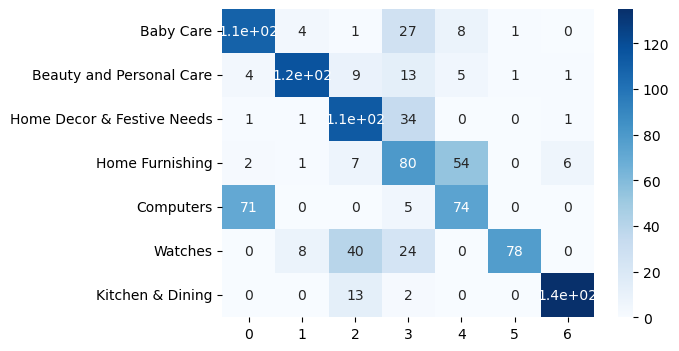

In [38]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

La matrice de confusion confirme les résultat obtenus avec les traitements antérieurs 

## Conclusion

Notre étude de faisabilité a révélé que le moteur de classification d'articles, basé sur les descriptions et les images, est viable.Le TF-IDF Vectorizer et l'Universal Sentence Encoder ont excellé dans le traitement textuel, tandis que le CNN Transfer Learning a été supérieur pour le traitement d'image.
Dans le cadre de notre approche de classification supervisée basée sur les images, nous avons obtenu des résultats très satisfaisants, ce qui renforce notre confiance en la faisabilité et la robustesse de notre moteur de classification d'articles. 
Ces résultats encourageants nous incitent à poursuivre l'optimisation de ces modèles. En prospectant, nous envisageons d'explorer l'intégration des informations textuelles et visuelles pour améliorer encore plus la performance de classification.